In [1]:
import sklearn
import numpy as np
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import os
import matplotlib.pyplot as plt
import argparse
from torch.autograd import Variable

In [22]:
root = "~/Data/MNIST"
mnist_dim = 28
flattened_dim = 28 * 28
myrange = 1000

In [23]:
pca = PCA(n_components=100)

In [24]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_data = torchvision.datasets.MNIST(root, transform=transform, download=True)
mnist_loader = torch.utils.data.DataLoader(mnist_data, 
                batch_size=1, 
                sampler=torch.utils.data.sampler.SubsetRandomSampler(np.random.choice(range(len(mnist_data)), len(mnist_data))))

In [25]:
X = np.zeros((myrange, flattened_dim))

In [26]:
labels = np.zeros(myrange)

In [27]:
for i in range(myrange):
    image, label = next(iter(mnist_loader)) # get some examples (ignore labels)
    image = image[0]
    label = label[0]
    labels[i] = label
    image = image.view(-1, flattened_dim)
    image = image.numpy().squeeze()
    X[i,:] = image
        

In [28]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
Y = pca.transform(X)

In [30]:
Y.shape

(1000, 100)

In [31]:
from sklearn.manifold import TSNE

In [32]:
X_embedded = TSNE(n_components=2).fit_transform(Y)

In [33]:
X_embedded.shape

(1000, 2)

In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [35]:
colors = cm.rainbow(np.linspace(0, 1, 10))
    

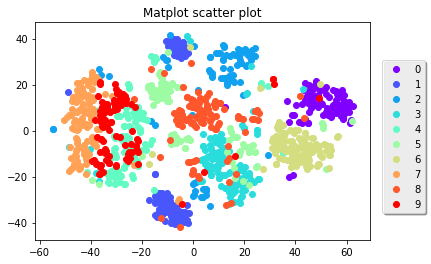

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(10):
    c = colors[i,:]
    indices = labels == i
    ax.scatter(X_embedded[indices, 0], X_embedded[indices, 1], color=c, label=str(i))
ax.legend(loc='upper center', bbox_to_anchor=(1.1, 0.85), shadow=True, ncol=1)
plt.title('PCA + tSNE on MNIST')
plt.show()